In [1]:
import pandas as pd
import numpy as np
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import matplotlib.dates as mdates  #處理日期

# 改style要在改font之前
# plt.style.use('seaborn')
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-11-10 05:23:59--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 209.85.147.100, 209.85.147.139, 209.85.147.101, ...
Connecting to drive.google.com (drive.google.com)|209.85.147.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vp81kpvctbecoj6lm50esfrc8eci0kvq/1699593825000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=cceff8d6-4421-447b-ac73-d4ee0bc605f4 [following]
--2023-11-10 05:23:59--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vp81kpvctbecoj6lm50esfrc8eci0kvq/1699593825000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=cceff8d6-4421-447b-ac73-d4ee0bc605f4
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 209.85.147.132, 2607:f8b0:4001:c20::84
Connecting to doc-0k

In [4]:
df_0050 = pd.read_csv("/content/0050_history.csv", sep=',')
df_0050.head(10)

,日期,開盤,最高,最低,收盤,漲跌,漲跌(%),成交張數
0,2023/11/09,126.90,127.40,126.65,127.20,0.00,0.00,4921.000
1,2023/11/08,126.65,127.45,126.50,127.20,0.70,0.55,11598.430
2,2023/11/07,126.50,126.80,126.10,126.50,-0.05,-0.04,6787.466
3,2023/11/06,126.55,127.20,126.35,126.55,1.10,0.88,16723.502
4,2023/11/03,125.00,125.60,124.70,125.45,0.95,0.76,9126.443
5,2023/11/02,123.15,124.50,123.15,124.50,2.75,2.26,10198.429
6,2023/11/01,122.00,122.15,121.25,121.75,0.60,0.50,4851.033
7,2023/10/31,122.40,122.45,121.10,121.15,-0.85,-0.70,11952.747
8,2023/10/30,122.40,122.85,121.75,122.00,-0.30,-0.25,9793.200
9,2023/10/27,122.15,122.75,122.10,122.30,0.55,0.45,4413.646


In [5]:
df_00631L = pd.read_csv("/content/00631L_history.csv", sep=',')
df_00631L.head(10)

,日期,開盤,最高,最低,收盤,漲跌,漲跌(%),成交張數
0,2023/11/09,133.00,133.90,132.55,133.60,0.10,0.07,2456.000
1,2023/11/08,132.50,134.05,132.40,133.50,1.20,0.91,3894.825
2,2023/11/07,131.50,132.45,131.30,132.30,0.05,0.04,3746.694
3,2023/11/06,131.85,133.30,131.40,132.25,2.65,2.04,8019.547
4,2023/11/03,128.85,129.95,128.65,129.60,1.75,1.37,5723.514
5,2023/11/02,126.15,127.85,126.10,127.85,4.95,4.03,5105.084
6,2023/11/01,123.25,123.40,121.65,122.90,1.10,0.90,3409.470
7,2023/10/31,124.55,124.70,121.50,121.80,-2.20,-1.77,4384.512
8,2023/10/30,124.60,125.30,123.85,124.00,-0.10,-0.08,2838.423
9,2023/10/27,124.20,125.10,123.75,124.10,1.35,1.10,3625.377


In [15]:
x = df_0050["收盤"][:2199]
y = df_00631L["收盤"][:2199]
print(np.polyfit(x, y, 1).round(3))

[  1.596 -89.109]


In [57]:
coef = np.polyfit(x, y, 2)
# degint: Degree of the fitting polynomial
reg_model = np.poly1d(coef)

print(reg_model)

          2
0.004905 x + 0.6037 x - 42.44


In [58]:
a = float((input("輸入:")))

print( "目標預測價:" + str(reg_model(a).round(3)))

輸入:122
目標預測價:104.228


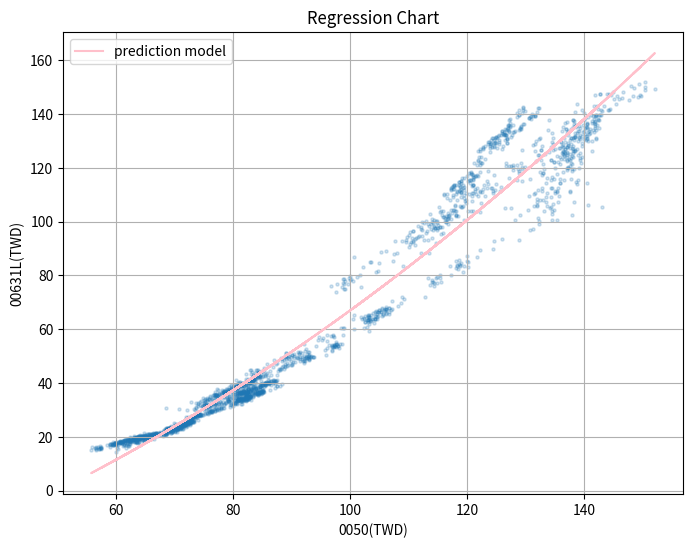

In [59]:
fig = plt.figure(figsize=(8,6))


# blue spot
plt.scatter(df_0050["收盤"][:2199],df_00631L["收盤"][:2199],s = 5 ,alpha=0.2)
# red line, y軸為預測價格
plt.plot(df_0050["收盤"][:2199],reg_model(df_0050["收盤"][:2199]), color = "pink",label = "prediction model")


plt.title("Regression Chart")
plt.xlabel("0050(TWD)")
plt.ylabel("00631L(TWD)")
plt.legend()
plt.grid(True)


plt.show()